# Question 5 

In [1]:
import csv

In [2]:
# key: Name
# value: Sector 
NameSectorDict = {}
csv_reader = csv.reader(open('./finance_data/Name_sector.csv', encoding='utf-8'))
for row in csv_reader:
    if row[0] == 'Symbol':
        continue
    else:
        NameSectorDict[row[0]] = row[1]

In [3]:
root_dir = './finance_data/data/'

In [4]:
# key: Name
# value: a list of [date, closing price]
NamePriceDict = {}
for name in NameSectorDict:
    file = root_dir + name + '.csv'
    csv_reader = csv.reader(open(file, encoding='utf-8'))
    for row in csv_reader:
        if row[0] == 'Date':
            continue
        else:
            if name in NamePriceDict:
                NamePriceDict[name].append((row[0], eval(row[4])))
            else:
                NamePriceDict[name] = [(row[0], eval(row[4]))]

In [5]:
NamePriceDict['A'][2][0]

'2014-05-05'

In [6]:
incomplete_list = ['CFG',
                    'CSRA',
                    'FTV',
                    'HPE',
                    'KHC',
                    'PYPL',
                    'QRVO',
                    'SYF',
                    'UA',
                    'WLTW',
                    'WRK']

In [7]:
step_reverse = [5]*3
step_reverse.extend([4])
step_reverse.extend([5]*6)
step_reverse.extend([4])
step_reverse.extend([5]*4)
step_reverse.extend([4,5,4,4,5,5,5,5,4])
step_reverse.extend([5]*10)
step_reverse.extend([4])
step_reverse.extend([5]*8)
step_reverse.extend([4,5,5,5,5,4])
step_reverse.extend([5]*9)
step_reverse.extend([4,5,5,5,5,4,5,5,5,4,5,5,4,4,5,5,5,4])
step_reverse.extend([5]*10)
step_reverse.extend([4])
step_reverse.extend([5]*9)
step_reverse.extend([4,5,5,5,5,4])
step_reverse.extend([5]*7)
step_reverse.extend([4,5,5,5,5,5,4,5,5,5,4,5,5,4,4])
step_reverse.extend([5,5,5,4])
step_reverse.extend([5]*11)
step_reverse.extend([4])
step_reverse.extend([5]*8)
step_reverse.extend([4,5,5,5,5,4,5,5,5])

In [8]:
len(step_reverse)

157

In [9]:
sum(step_reverse)

758

In [10]:
# key: Stock Name
# value: the closing price sampled on Monday(the first day of the week) in a reverse order.
NamePriceDict_sampled = {}
for name in NamePriceDict:
    pl = NamePriceDict[name]
    i = len(pl)-5
    n = 0
    new_pl = []
    while (i >= 0):
        #print (pl[i][0])
        new_pl.append(pl[i][1])
        if n == len(step_reverse):
            break
        i -= step_reverse[n]
        n += 1
        #print(i)
    NamePriceDict_sampled[name] = new_pl

In [11]:
len(NamePriceDict_sampled['A'])

158

In [12]:
# key: Name
# value: a list of return in chronological order (not in the reverse order)
NameReturnDict_week = {}
for name in NamePriceDict_sampled:
    if name in incomplete_list:
        continue
    returnList = []
    for i in range(len(NamePriceDict_sampled[name])-2,-1,-1):
        
        r = (NamePriceDict_sampled[name][i]-NamePriceDict_sampled[name][i+1])/NamePriceDict_sampled[name][i+1]
        returnList.append(r)
    NameReturnDict_week[name] = returnList

In [13]:
import math

In [14]:
# key: Name
# value: a list of log normalized return
NameLogReturnDict_week = {}
for name in NameReturnDict_week:
    for i in NameReturnDict_week[name]:
        r = math.log(1+i)
        if name not in NameLogReturnDict_week:
            NameLogReturnDict_week[name] = [r]
        else:
            NameLogReturnDict_week[name].append(r)

In [15]:
def average(seq):
    s = 0
    #print (seq)
    for i in seq:
        s += i
    return s/(1.0*len(seq))

In [16]:
def cal_correlation(r_i, r_j):
    if len(r_i) > len(r_j):
        r_i = r_i[len(r_i)-len(r_j):]
    elif len(r_i) < len(r_j):
        r_j = r_j[len(r_j)-len(r_i):]
    l = len(r_i)
    
    #print (len(r_i))
    #print (len(r_j))
    
    cross_product = 0
    r_i_sq = 0
    r_j_sq = 0
    
    for t in range(0, l):
        cross_product += r_i[t] * r_j[t]
        r_i_sq += r_i[t] * r_i[t]
        r_j_sq += r_j[t] * r_j[t]
    #print(cross_product)
    #print(r_i_sq)
    #print(r_j_sq)
    
    #num = sum(cross_product)/(l*1.0) - (sum(r_i)/(l*1.0))*(sum(r_j)/(l*1.0))
    #den = (sum(r_i_sq)/(l*1.0)-sum(r_i)/(l*1.0)) * (sum(r_j_sq)/(l*1.0)-sum(r_j)/(l*1.0))
    num = cross_product/(l*1.0) - average(r_i)*average(r_j);
    #print (num)
    den = (r_i_sq/(l*1.0) - (average(r_i))*(average(r_i))) * (r_j_sq/(l*1.0) - (average(r_j))*(average(r_j)))
    #print (den)
    cor = num/math.sqrt(den)
    
    return cor

In [17]:
# key: (Stock_Name_i, Stock_Name_j)
# value: correlation value
corDict = {}
for name_i in NameLogReturnDict_week:
    for name_j in NameLogReturnDict_week:
        if name_i == name_j:
            continue
        elif (name_i,name_j) in corDict or (name_j, name_i) in corDict:
            continue
        else:
            corDict[(name_i,name_j)] = cal_correlation(NameLogReturnDict_week[name_i],NameLogReturnDict_week[name_j]);

In [18]:
len(corDict)

121771

In [19]:
cal_correlation(NameLogReturnDict_week['A'],NameLogReturnDict_week['AAL'])

0.24951538619087846

In [20]:
import collections
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
G = nx.Graph()

In [22]:
for name in NameSectorDict:
    G.add_node(name)

In [23]:
for pairs in corDict:
    #print (pairs)
    #print (corDict[pairs])
    w  = math.sqrt(2*(1-corDict[pairs]))
    G.add_edge(pairs[0], pairs[1], weight = w)

In [24]:
# add sector info to nodes
sectorlist = []
for name in NameSectorDict:
    G.nodes[name]['sector'] = NameSectorDict[name]
    if NameSectorDict[name] not in sectorlist:
        sectorlist.append(NameSectorDict[name])

In [25]:
T = nx.minimum_spanning_tree(G)

In [26]:
from itertools import count
mapping = dict(zip(sorted(sectorlist),count()))
nodes = T.nodes()
colors = [mapping[T.nodes[n]['sector']] for n in nodes]

In [27]:
mapping

{'Consumer Discretionary': 0,
 'Consumer Staples': 1,
 'Energy': 2,
 'Financials': 3,
 'Health Care': 4,
 'Industrials': 5,
 'Information Technology': 6,
 'Materials': 7,
 'Real Estate': 8,
 'Telecommunication Services': 9,
 'Utilities': 10}

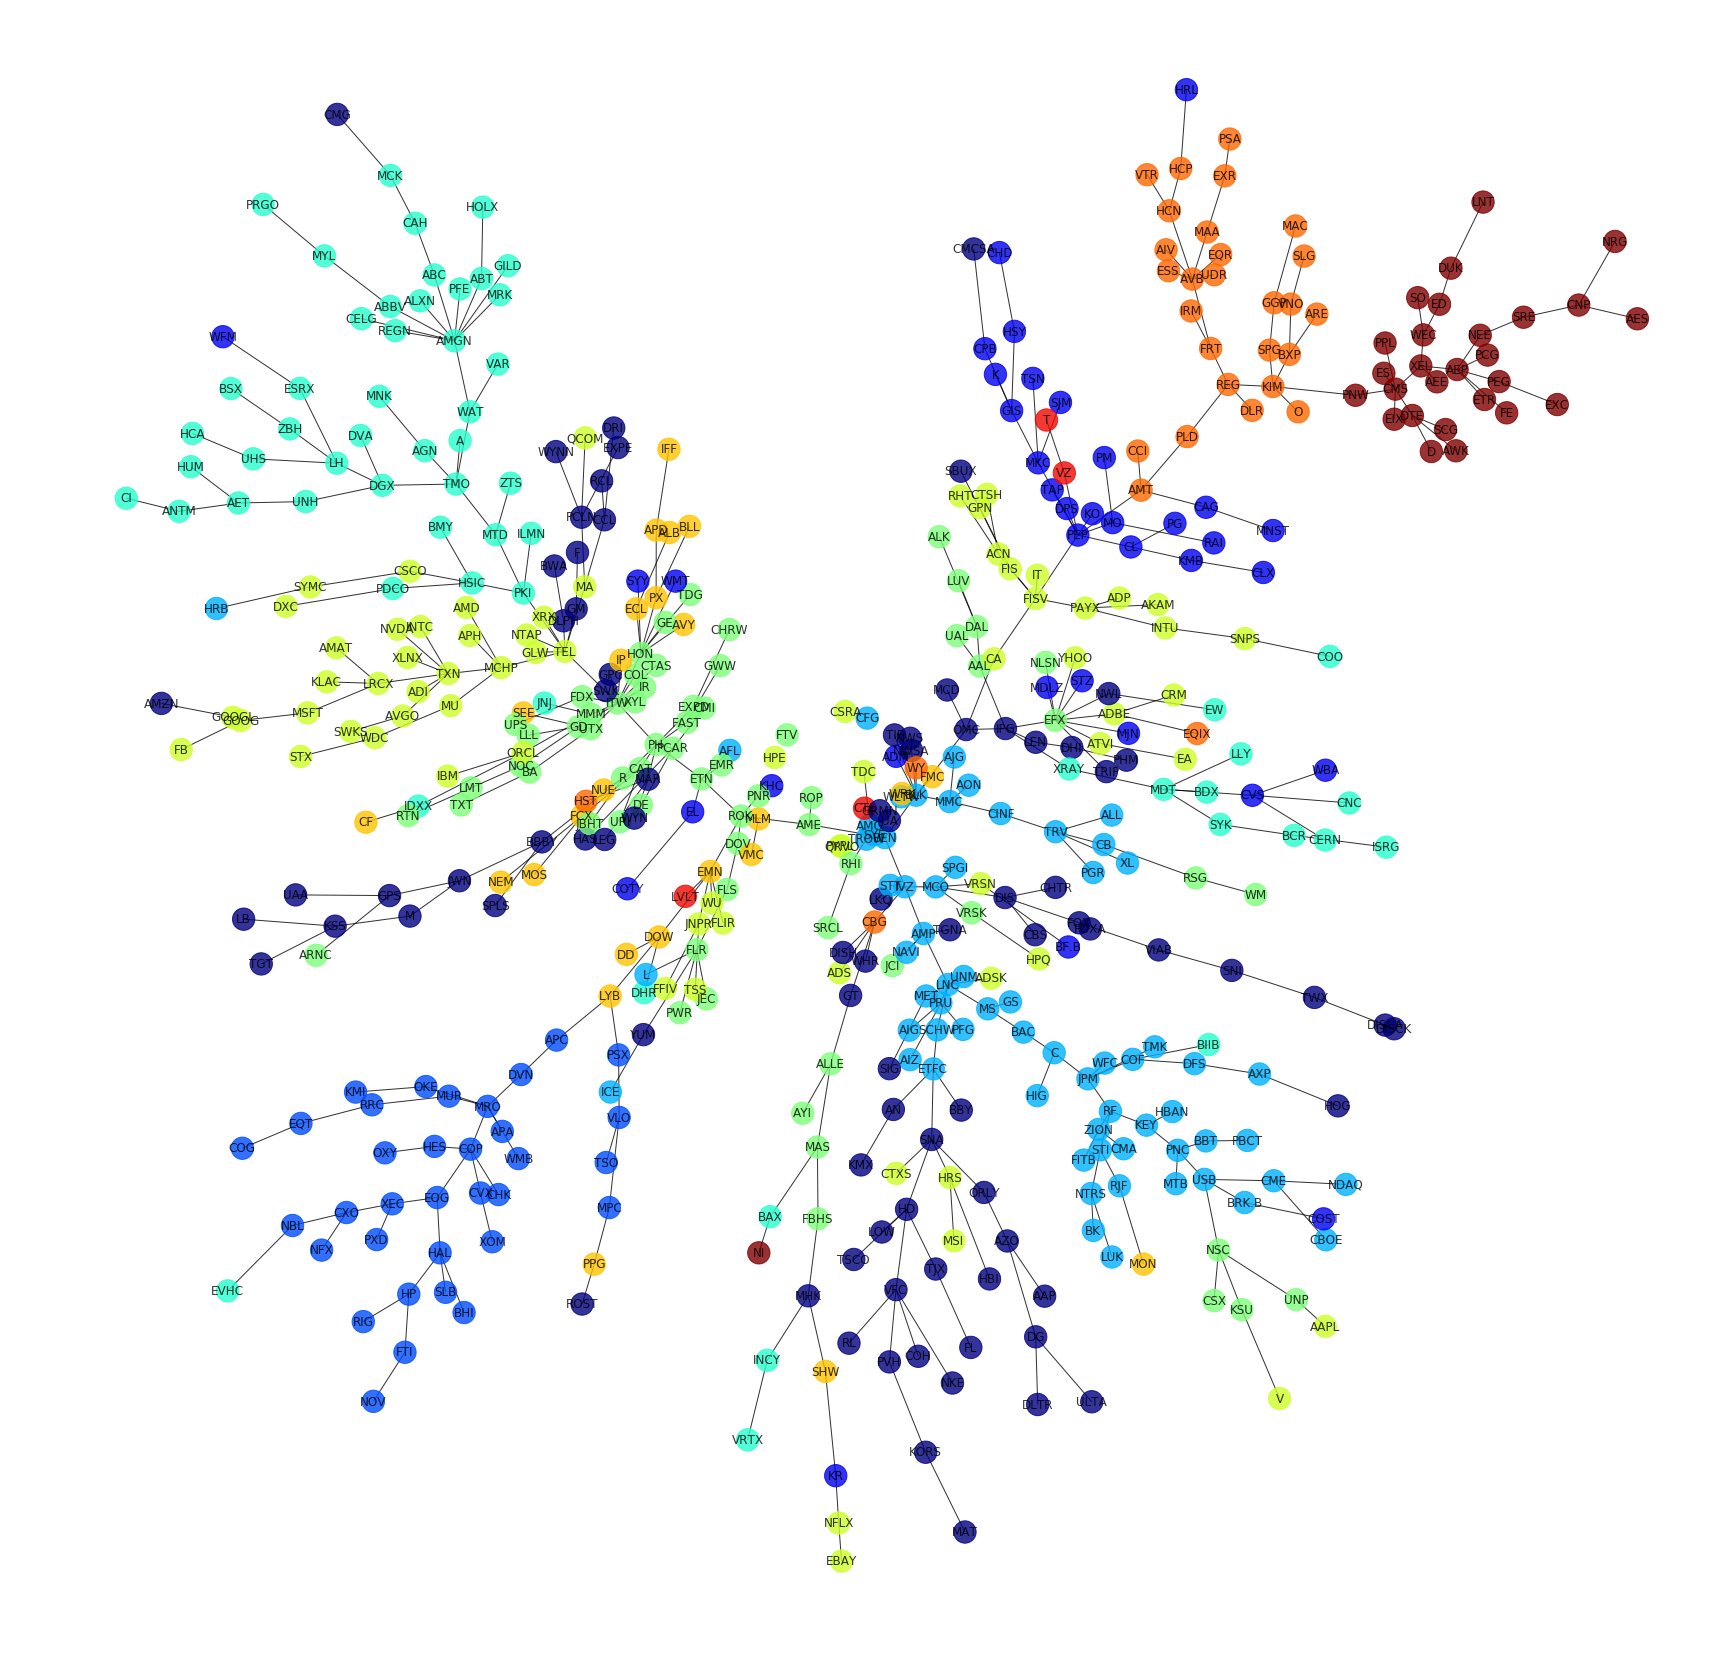

In [28]:
pos = nx.kamada_kawai_layout(T)
plt.figure(figsize=(30,30))
plt.axis('off')
nx.draw_networkx(T, pos, with_labels = True, alpha = 0.8,
                 nodelist=nodes, node_color=colors, node_size=500, cmap=plt.cm.jet)
plt.show()

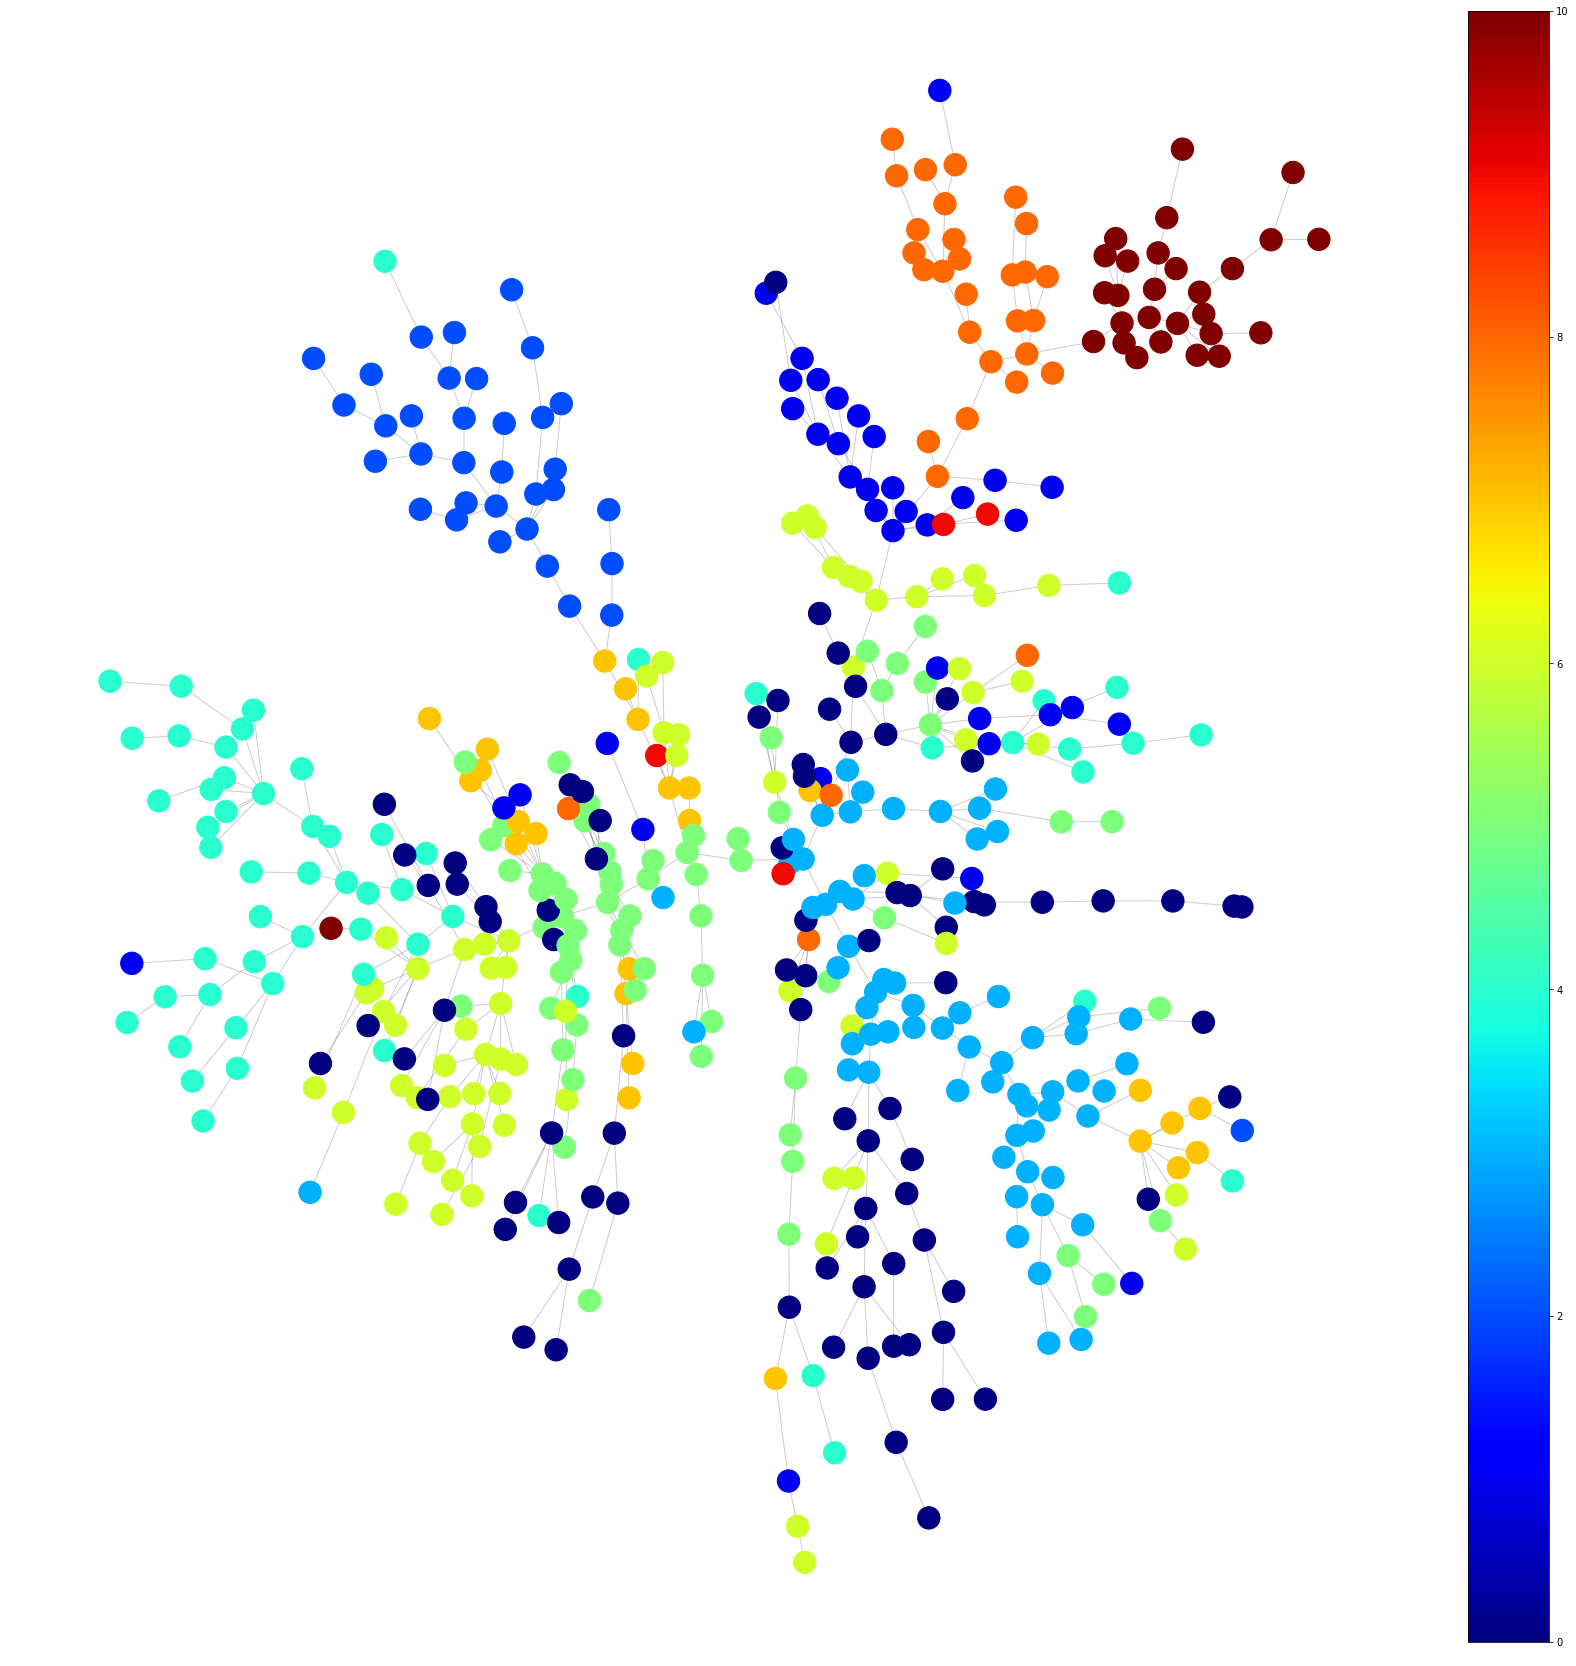

In [32]:
pos = nx.kamada_kawai_layout(T)
plt.figure(figsize=(30,30))
plt.axis('off')
ec = nx.draw_networkx_edges(T, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(T, pos, with_labels = True, nodelist=nodes, node_color=colors, node_size=500, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.show()